<a href="https://colab.research.google.com/github/kreimben/ML_Notes/blob/main/Lv1_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%9A%8C%EA%B7%80%EB%82%98%EB%AC%B4%EB%A1%9C_%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Lv1. 의사결정회귀나무로 따릉이 데이터 예측하기](https://dacon.io/competitions/open/235698/overview/description) 예제.



데이터를 분석하기 위해 불러오고, 조작하는 등 핸들링을 하려면 도구가 필요합니다. 대표적으로 pandas, numpy, matplotlib 등이 있습니다. 머신러닝을 하려면 최우선적으로 이러한 도구, 즉 라이브러리를 불러와야 합니다.

In [ ]:
import pandas as pd
data = pd.read_csv('파일경로/파일이름.csv')

read_csv() 를 통해 csv 파일을 pandas 라이브러리에서 제공하는 DataFrame 객체로 변환했다면, 우선 불러온 데이터의 행과 열의 갯수를 shape attribute 로 관찰할 수 있습니다.

In [ ]:
[DataFrame 변수명].shape

Pandas 라이브러리를 이용하여 데이터를 확인하는 방법은 여러 가지가 있지만, 그중 가장 대표적인 메서드는 `head()` 메서드 입니다.

`head()` 메서드는 데이터 전부를 보여주지 않고 데이터의 상단부분만 출력하여 보여줍니다.

`head()`와 유사한 메서드로는 `tail()`메서드가 있고, `tail()` 메서드는 데이터의 하단 부분을 출력하여 보여줍니다.

In [ ]:
import pandas as pd

train = pd.read_csv('data/train.csv')

train.head() # train 데이터의 상단 5개 행 출력

결측치(Missing Value)는 말 그대로 데이터에 값이 없는 것을 뜻합니다. 줄여서 'NA'라고 표현하기도 하고, 다른 언어에서는 Null 이란 표현을 많이 씁니다.

Pandas 에서는 결측치를 NaN 값으로 표현합니다.

Pandas에서 isnull() 메서드를 사용하면 DataFrame에서 NaN 값을 확인 할 수 있습니다.

isnull() 메소드는 Dataframe에서 데이터가 NaN 값이면 True로, 그렇지 않으면 False로 값을 리턴합니다.

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
        'name': ['kwon', 'park', 'kim'],
        'age':[30, np.nan, 19],
        'class':[np.nan, np.nan, 1]
})

df.isnull()


,name,age,class
0,False,False,True
1,False,True,True
2,False,False,False


그리고 `isnull()` 메서드 뒤에 `sum()` 메서드를 추가 해주면 데이터 프레임의 각 열 별 결측치의 수를 확인 할 수 있습니다.

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
        'name': ['kwon', 'park', 'kim'],
        'age':[30, np.nan, 19],
        'class':[np.nan, np.nan, 1]
})

df.isnull().sum()

name     0
age      1
class    2
dtype: int64

Dataframe에 info() 매서드를 사용하면, 피쳐들의 기본 정보(결측치와 데이터 타입 등 )를 확인할 수 있습니다. 모델링에 앞서 결측치가 있다면, 결측치들을 어떻게 다뤄야할지 고민하고 처리하는 과정이 필요합니다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   age     2 non-null      float64
 2   class   1 non-null      float64
dtypes: float64(2), object(1)
memory usage: 200.0+ bytes


dropna() 를 사용하면, 결측치를 갖는 행을 DataFrame 객체에서 삭제합니다. 결측치를 처리하는 방법은 여러가지가 있지만, Lv1에서는 가장 쉽고 간단한 방법인 결측치를 가진 행을 제거 하는 방법에 실습해 보겠습니다.

또한 fillna() 를 사용해 모든 결측치를 인자값으로 대체할 수도 있습니다.

In [6]:
DataFrame.dropna()
DataFrame.fillna()

NameError: ignored

EDA 와 전처리를 끝내신 여러분 수고하셨습니다. 👏 EDA 를 통해 데이터를 살펴보고, 전처리를 하셨다면, 이제 본격적으로 머신러닝(Machine Learning) 모델을 훈련시키고, 훈련된 모델을 통해 예측을 해볼 것입니다. 💪


선행 연구된 놀랍고 다양한 모델들이 있는데, 이러한 ML 모델들을 TensorFlow, PyTorch 등 Python 오픈소스 머신 러닝 라이브러리를 통해 손쉽게 구현할 수 있습니다. 🎉 


우리는 먼저 scikit-learn 라이브러리를 사용해 모델링을 시작해볼 것입니다. 😲


사용방법은 아주 간단합니다. Lv1_EDA_1/5_라이브러리불러오기(import) 에서처럼 import 하기만 하면 됩니다. 😉


In [7]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

의사결정나무란? 🤷

결정 트리는 의사 결정 규칙과 그 결과들을 트리 구조로 도식화한 의사 결정 지원 도구의 일종입니다. 즉 스무고개 방식으로 구조화되는 것입니다.

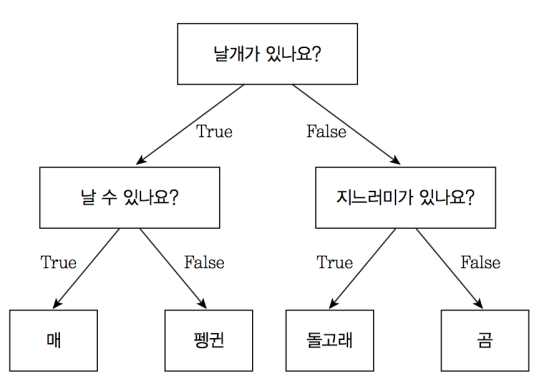


원리를 살펴보겠습니다. 🧑‍🏫


EDA 를 통해 data를 살펴보면 각 행(row) 들은 피쳐들을 갖고 있습니다. 이 중 하나의 피쳐를 정해서 해당 피쳐의 값에 대해 특정한 하나의 값을 정한다면, 이를 기준으로 모든 행(row) 들을 두 개의 노드(node) 로 분류(Binary decision rule. 이진분할) 할 수 있습니다. ✅


만약 특정하게 2️⃣개를 정한다면 3️⃣진분할이 되는 것입니다. 대표적인 의사결정나무인 CART 의사결정 나무 는 이진분할을 사용합니다. 앞으로 CART 의사결정나무에 맞춰 설명을 이어나가겠습니다. 


자 그럼, 🔄 파생된 두 개의 노드에 대해서 또 다시 새로운 피쳐의 특정한 값을 정하고 분류를 진행합니다. 그리고 이 과정을 반복하게 되면 점차 피쳐의 값에 따라 data 들이 분류가 되며 이것이 의사결정 나무의 원리입니다. 🌳


특정한 값을 정하는 의사결정 나무의 대원칙은 ✅ "한쪽 방향으로 쏠리도록" ✅ 입니다. 🙅 분류될 때는 공평하게 비슷한 양으로 나뉘도록 값을 정하는 것이 아니라, 🙆 "한쪽 방향으로 쏠리도록" 해주는 특정한 값을 찾는 것이며, 이를 불순도를 계산해서 찾아냅니다.


의사결정나무 모델은 scikit-learn 에서 모듈을 불러올 수 있습니다.

In [8]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

In [10]:
from sklearn.tree import DecisionTreeRegressor 

모델을 선언한 후, fit(X, Y) 함수를 사용해서 모델을 훈련시킬 수 있습니다. 💪

여기서 주의해야 할 점은 X 데이터는 예측에 사용되는 변수들이고, ✅ Y 데이터는 예측결과 변수여야 한다는 것입니다. ✅


X 데이터는 train data 에서 drop([‘제외할컬럼명’], axis=1) 함수를 이용해 예측할 피쳐를 제외할 수 있습니다.

Y 데이터는 train[‘예측할컬럼명'] 으로 인덱싱할 수 있습니다.

In [ ]:
X_train = train.drop(['제외할컬럼명'], axis=1)
Y_train = train['예측할컬럼명']

이제 모델을 선언하고, fit() 함수를 이용해 모델을 훈련시킬 수 있습니다.

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

테스트 파일을 훈련된 모델로 예측해보겠습니다. 훈련된 모델에서 predict() 매서드에 예측하고자 하는 data 를 인자로 넣어주게 되면 해당 결과 array 를 할당할 수 있습니다.

In [ ]:
[할당할 array] = model.predict(test)

훈련시킨 모델로 테스트 파일을 예측했다면 데이콘에 예측결과를 제출할 csv 파일을 만들어봅시다. 💪


1️⃣ 백지의 답안지인 submission.csv 파일을 df 파일로 불러와서 예측결과를 덧입혀주고

2️⃣ 덧입혀준 df 파일을 csv 파일로 내보낸 후,

3️⃣ 드라이브에 저장된 csv 파일을 다운받아서

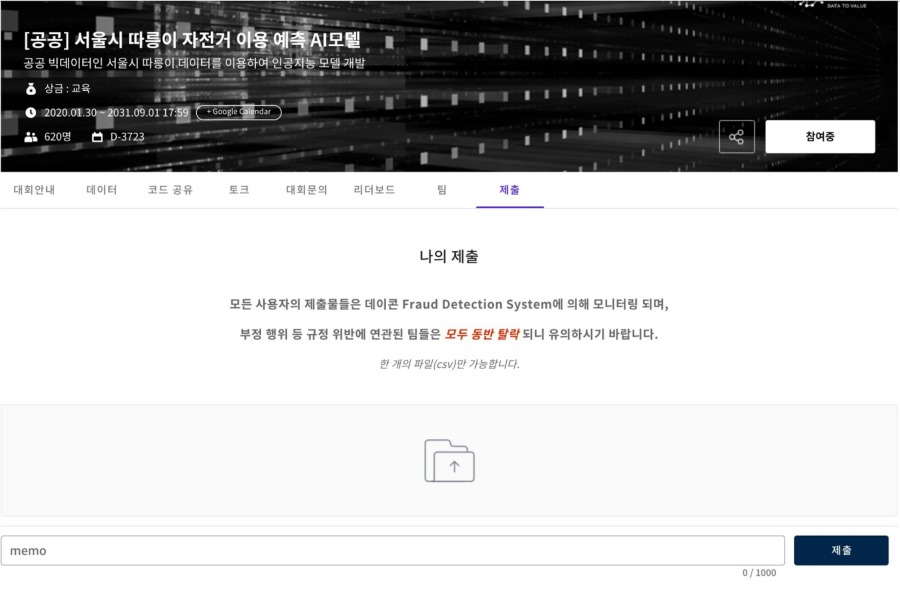



# Do it myself!

Loading public data from google drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

submission = pd.read_csv('/content/drive/My Drive/따릉이/submission.csv')
train = pd.read_csv('/content/drive/My Drive/따릉이/train.csv')

In [6]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

X_train = train.drop(['count'], axis=1)
Y_train = train['count']

To Check null value in `train`.

In [7]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

So I should deal with null value.

In [4]:
train = train.dropna()
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [8]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [9]:
test = pd.read_csv('/content/drive/My Drive/따릉이/test.csv')

OK, Fitting into model is done. Let's test it.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [14]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [13]:
test = test.fillna(0)

In [15]:
test_predict = model.predict(test)

In [16]:
test_predict[:5]

array([106., 164.,  88.,  49.,  64.])

We've got predictable data from `train.csv` and prediction from `test.csv`.
So Let's wrapping predictable data into `submission.csv`.

In [17]:
submission['count'] = test_predict

Yup!, Let's see what's in the `submission`'s data.

In [18]:
submission

,id,count
0,0,106.0
1,1,164.0
2,2,88.0
3,4,49.0
4,5,64.0
...,...,...
710,2148,137.0
711,2149,137.0
712,2165,132.0
713,2166,213.0


OK, `submission` seems to be ready.

In [20]:
submission.to_csv('/content/drive/My Drive/따릉이/sub.csv',index=False)